# Exploration 5
# ÎØ∏ÎãàÌîÑÎ°úÏ†ùÌä∏ : ÎÇòÏùò Ï≤´ Î≤àÏß∏ Ï∫êÍ∏Ä Í≤ΩÏßÑÎåÄÌöå, Î¨¥ÏûëÏ†ï Îî∞ÎùºÌï¥Î≥¥Í∏∞

### 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞

In [1]:
#ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

#ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏßÄÏ†ïÌïòÍ∏∞
data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')  #ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/test.csv


In [3]:
#Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))  #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî priceÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïª¨ÎüºÏù¥ ÌïòÎÇò Ï†ÅÏùå

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [4]:
#ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎùºÎ≤® Ï†úÍ±∞ÌïòÍ∏∞
y = data['price']      #yÏóê Ï†ÄÏû•Ìï¥ÎÜìÍ∏∞
del data['price']      #price Ïª¨Îüº Ï†úÍ±∞

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
#ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
train_len = len(data)                 #training dataÏùò Í∞úÏàòÎ•º Ï†ÄÏû•Ìï¥ÏÑú Ï∂îÌõÑÏóê ÌïôÏäµÎç∞Ïù¥ÌÑ∞Îßå Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©
data = pd.concat((data, sub), axis=0) #Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

print(len(data))

21503


In [6]:
#Ìëú ÏÇ¥Ìé¥Î≥¥Í∏∞
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

Í∞Å Ïª¨ÎüºÏù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µÏàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : Í∑ºÏ≤ò 15 Í∞ÄÍµ¨Ïùò Ï£ºÍ±∞ Í≥µÍ∞Ñ, ÌèâÎ∞© ÌîºÌä∏
21. sqft_lot15 : Í∑ºÏ≤ò 15Í∞ÄÍµ¨Ïùò Î∂ÄÏßÄ, ÌèâÎ∞© ÌîºÌä∏

### 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

#### (1) Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïúÎã§.

<AxesSubplot:>

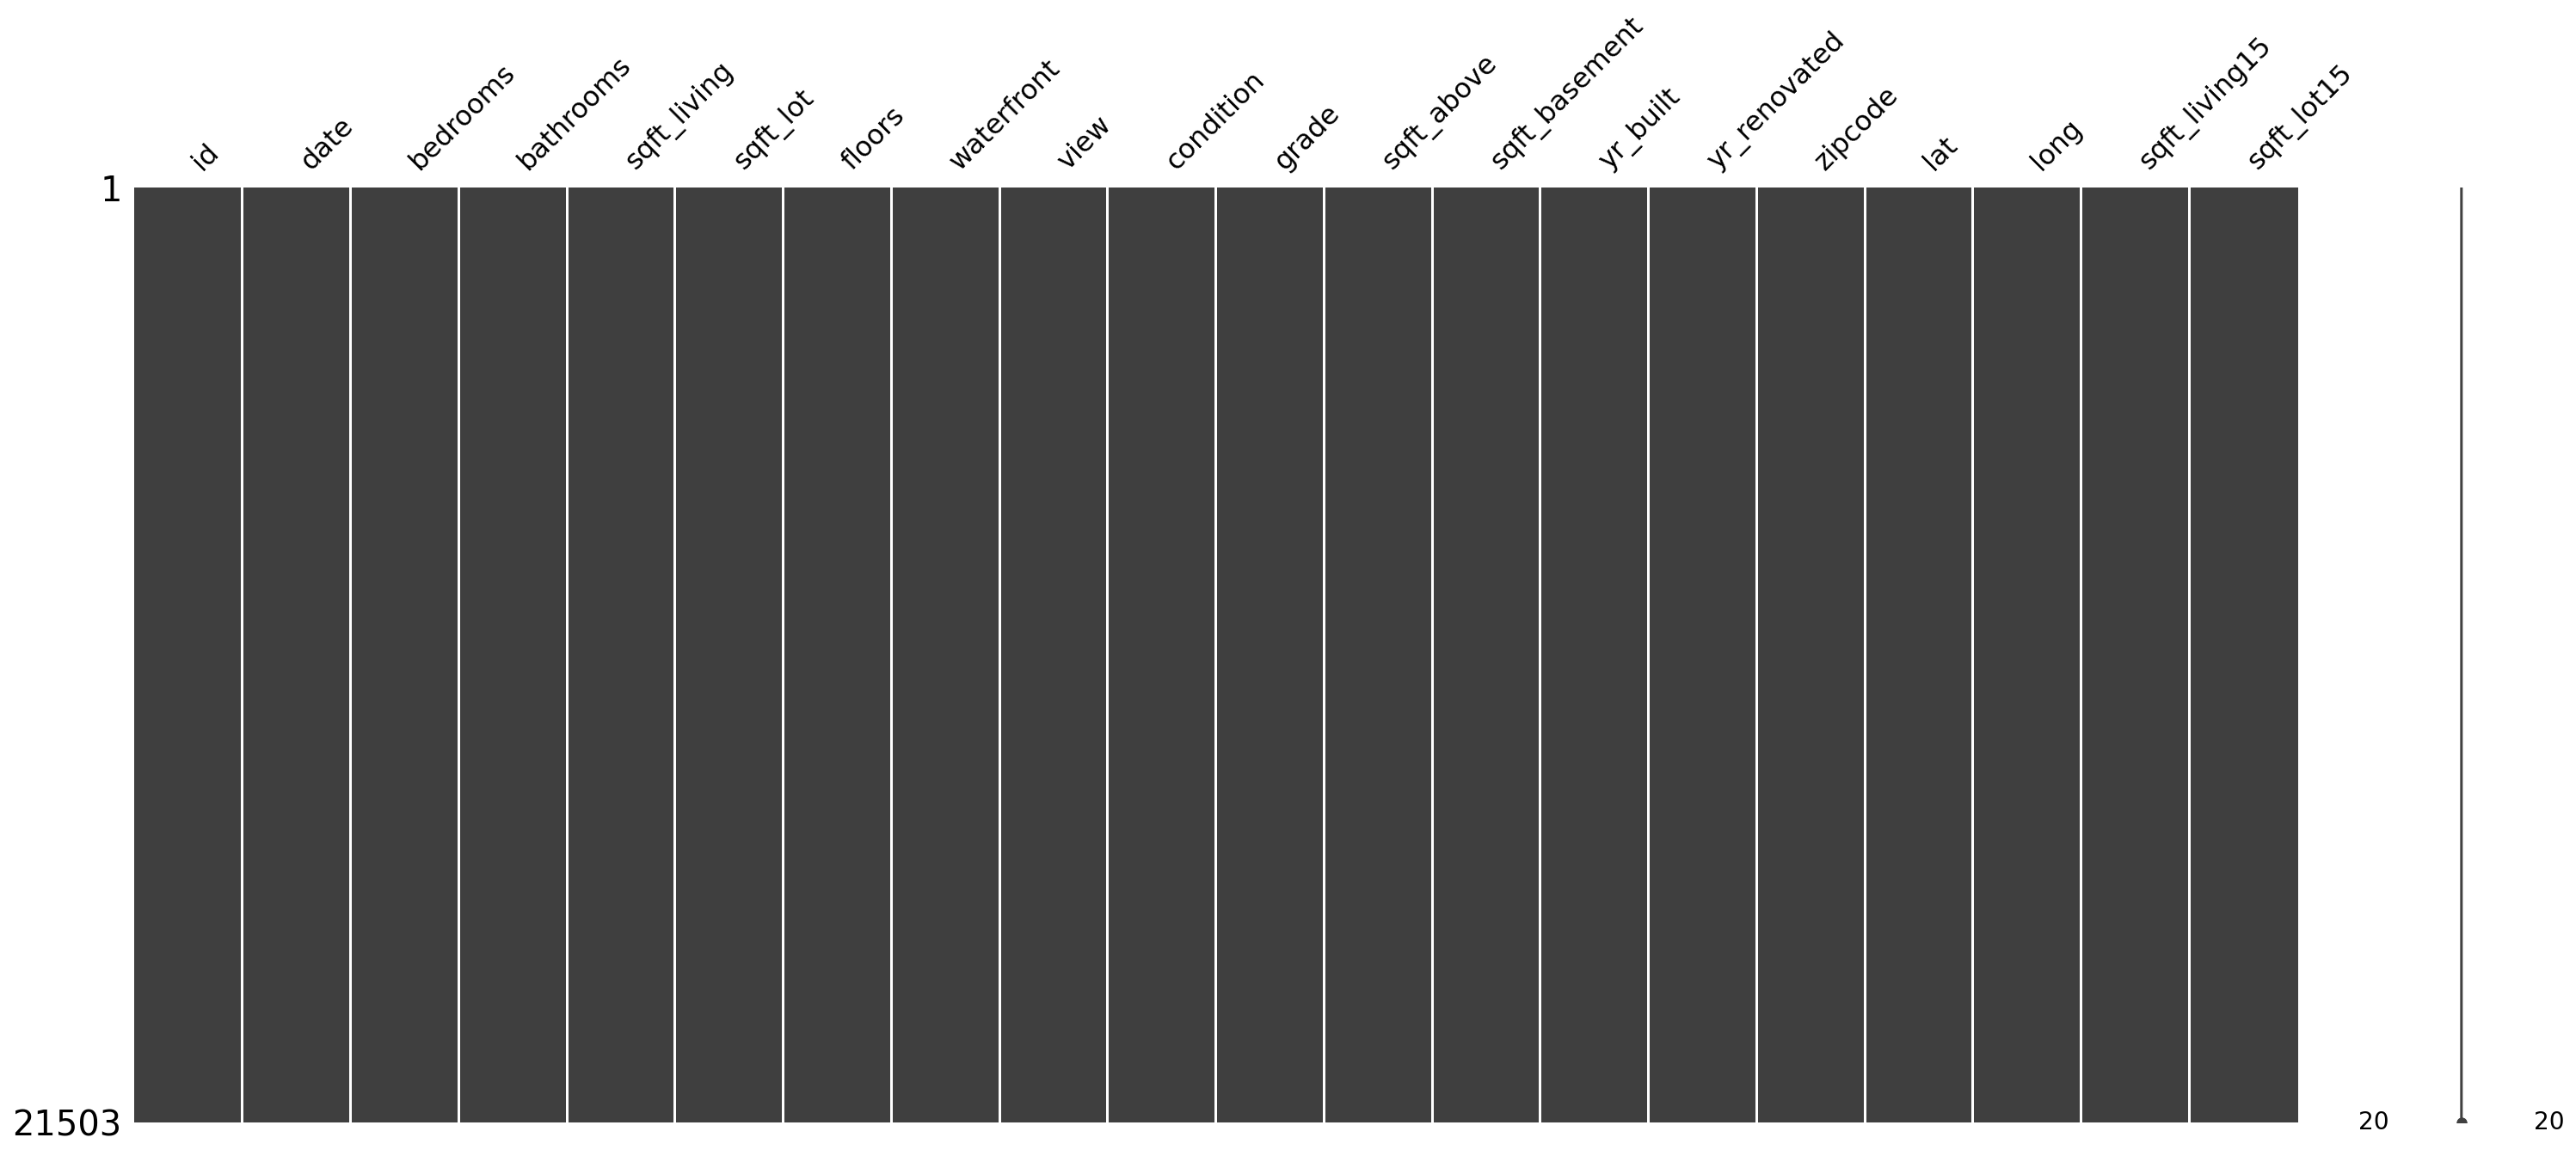

In [7]:
#Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨
msno.matrix(data)  # DataFrameÏùÑ Îß§Ìä∏Î¶≠Ïä§ Î™®Ïñë Í∑∏ÎåÄÎ°ú ÏãúÍ∞ÅÌôî

In [8]:
#Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏(Í≤∞Ï∏°Ïπò ÏóÜÏùå)
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


#### (2) id, date Î≥ÄÏàòÎ•º Ï†ïÎ¶¨ÌïúÎã§.

In [9]:
#id, date Î≥ÄÏàò Ï†ïÎ¶¨
sub_id = data['id'][train_len:]  # ÎÇòÏ§ëÏóê ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†úÏ∂úÌï† ÎïåÎ•º ÎåÄÎπÑÌïòÏó¨ sub_id Î≥ÄÏàòÏóê id ÏπºÎüºÏùÑ Ï†ÄÏû•Ìï¥ Ï§å
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

#### (3) Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïúÎã§.
-> ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Îã§Î©¥ Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏùå

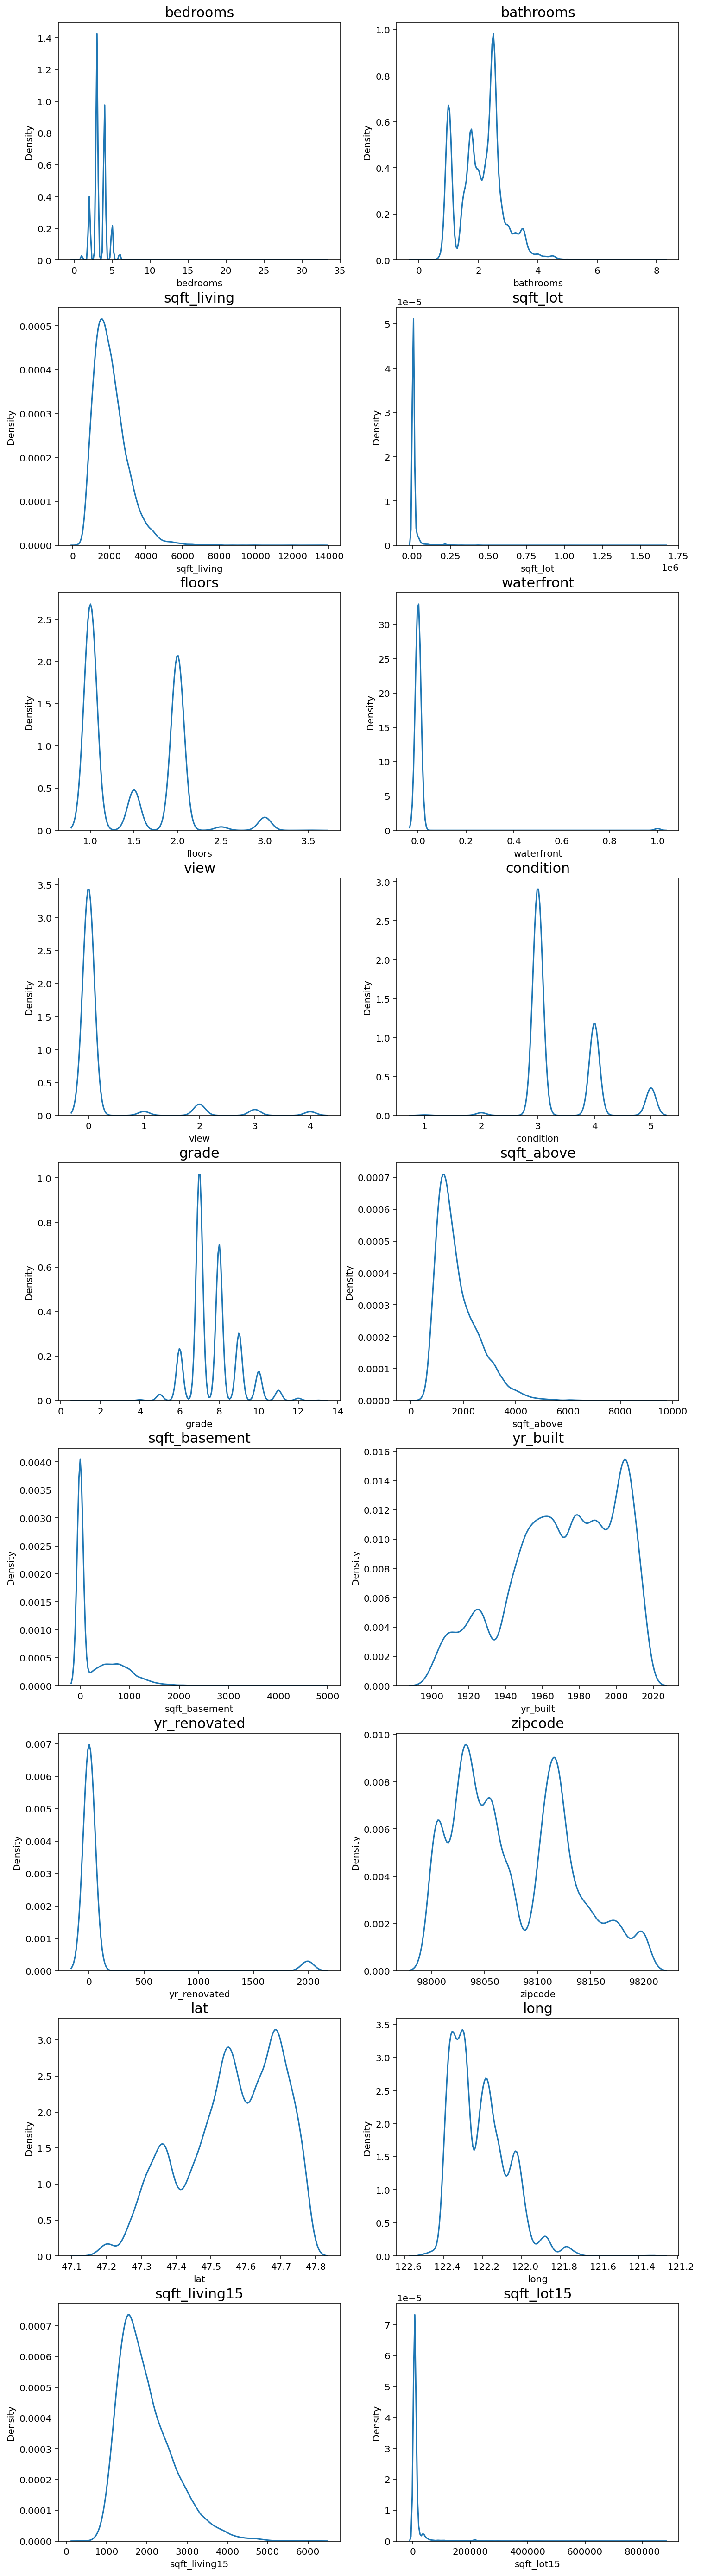

In [11]:
#Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎ©¥ figsizeÏùò xÍ∞í Ï°∞Ï†à 
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

#id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

#### (4) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Ï°∞Ï†ï

In [12]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

print('Ïñçüí¢')

Ïñçüí¢


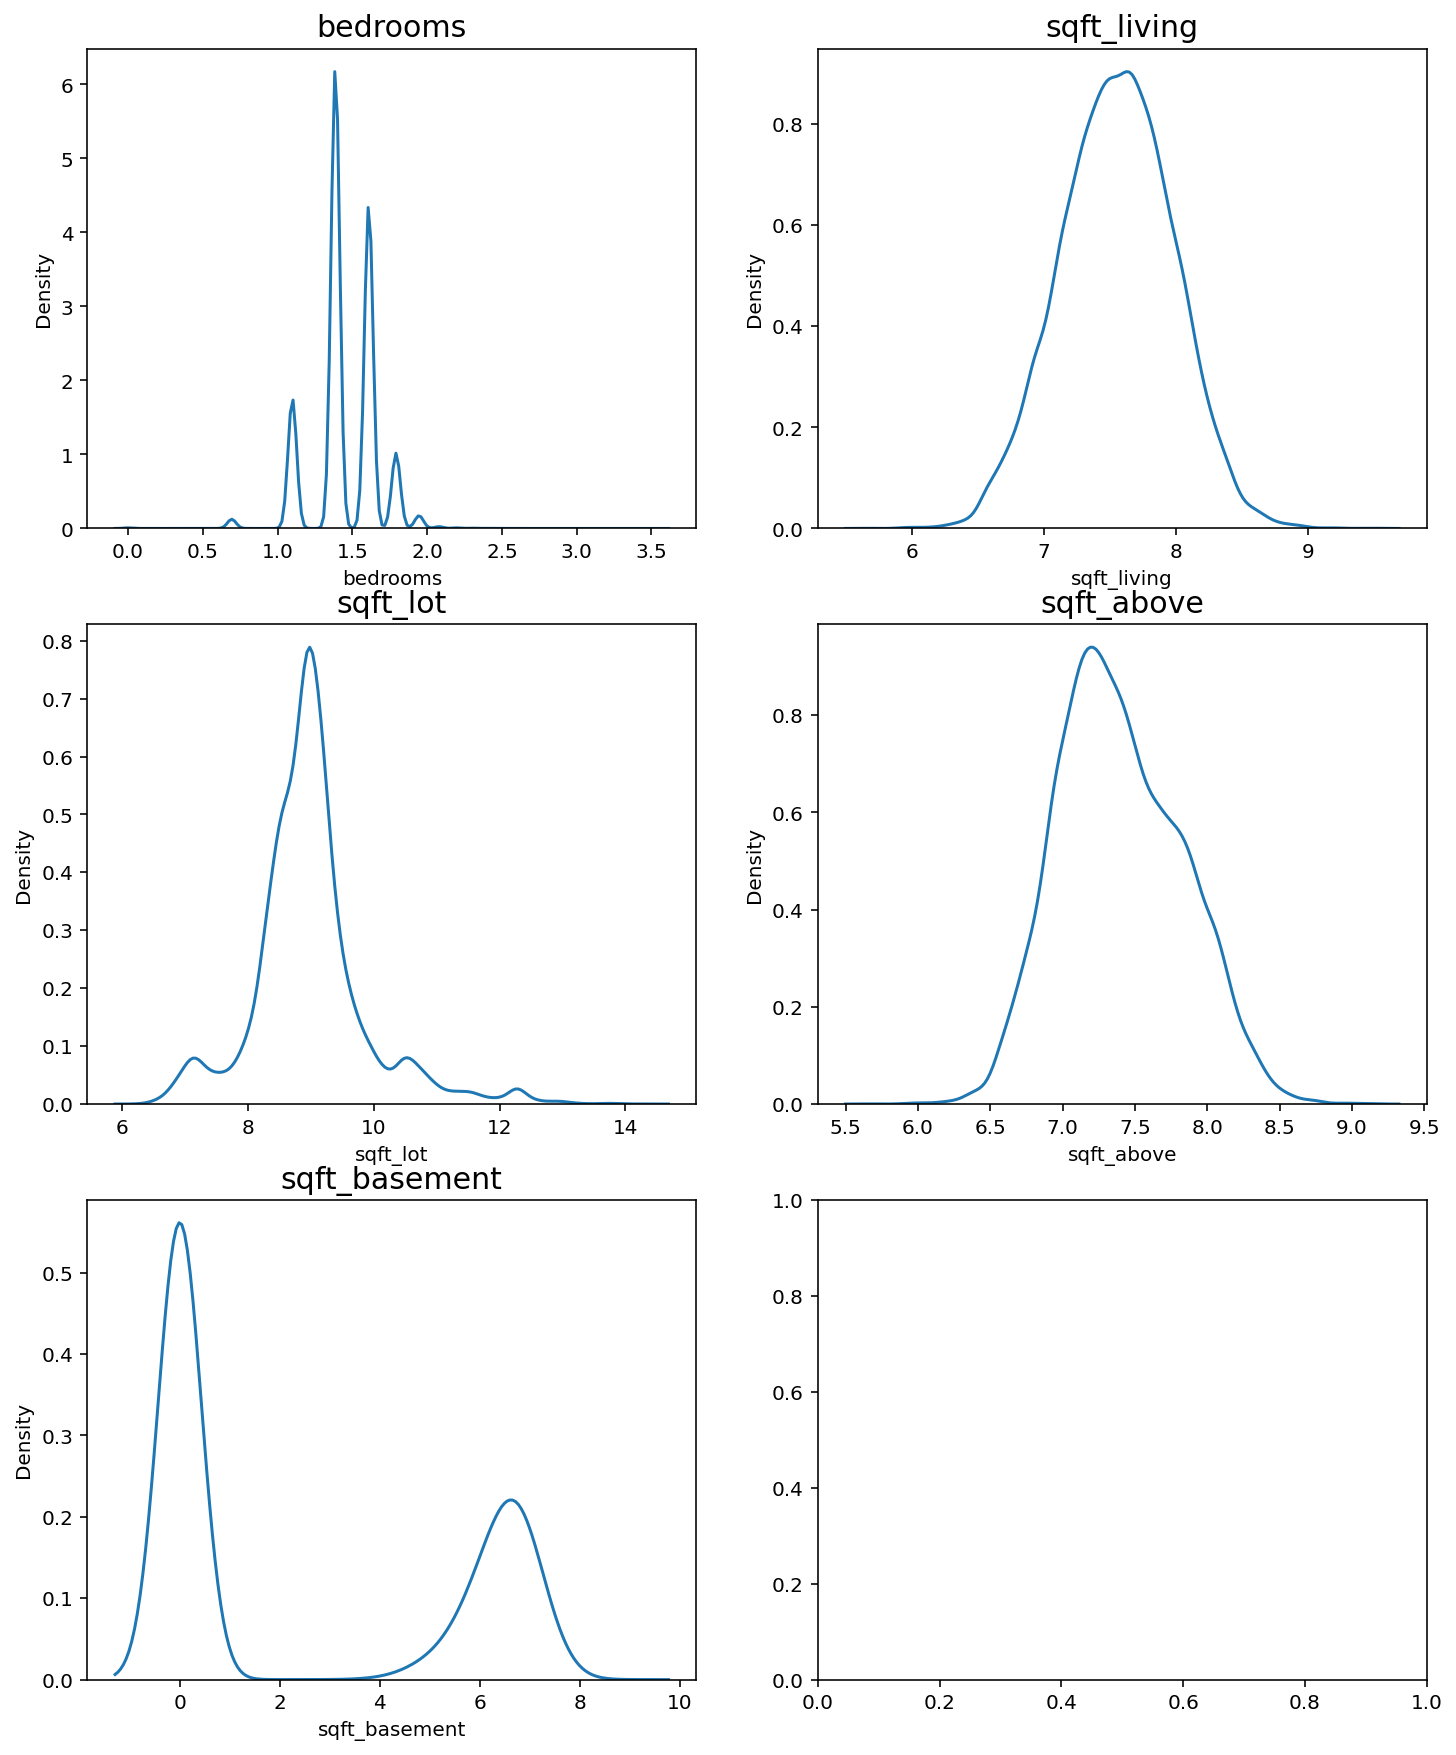

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

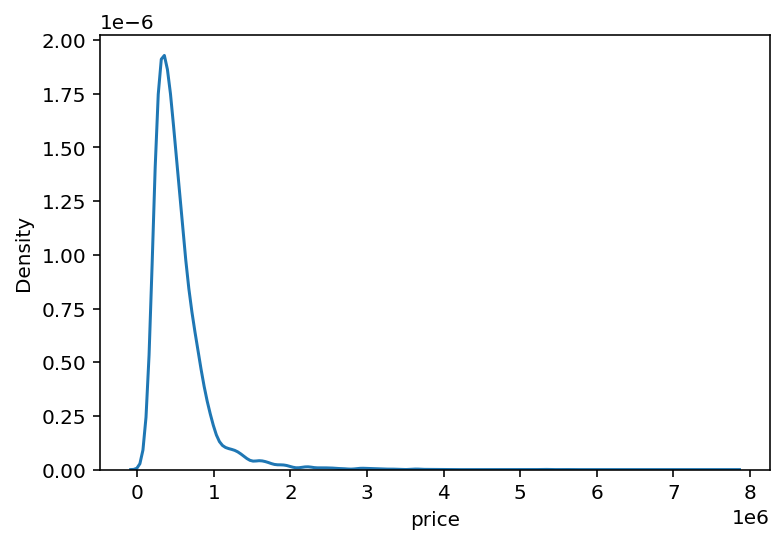

In [14]:
sns.kdeplot(y)
plt.show()

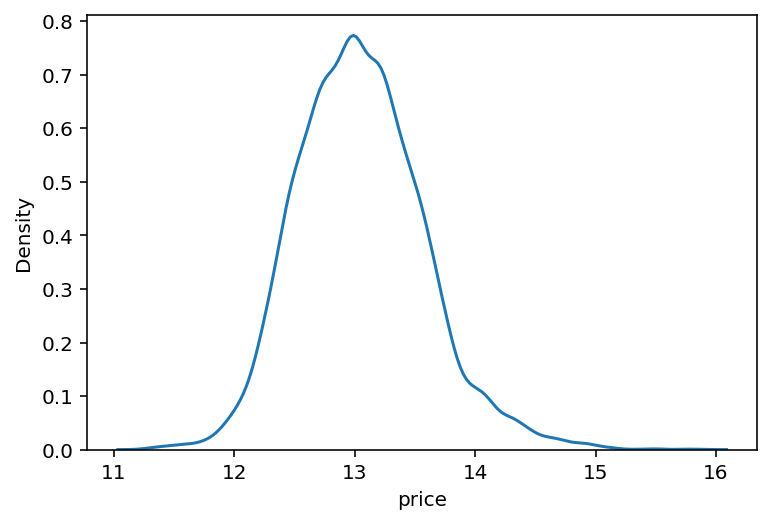

In [15]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [16]:
#ÏúÑÏóêÏÑú Ï†ÄÏû•Ìï¥Îëî train_lenÏùÑ Ïù∏Îç±Ïä§Î°ú ÌôúÏö©Ìï¥ÏÑú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú ÎÇòÎàÑÏñ¥ Ï§ÄÎã§.
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


### 3. Î™®Îç∏ÎßÅ
#### (1) Average Blending

In [17]:
#Average Blending
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


#### (2) Cross Validation

In [18]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


#### (3) Make Submission

In [19]:
#AgeragingBlending()Îäî models ÎîïÏÖîÎÑàÎ¶¨ ÏïàÏóê ÏûàÎäî Î™®Îç∏ÏùÑ Î™®Îëê xÏôÄ yÎ°ú ÌïôÏäµÏãúÌÇ® Îí§
#predictionsÏóê Í∑∏ ÏòàÏ∏° Í≤∞Í¥èÍ∞íÏùÑ Î™®ÏïÑÏÑú ÌèâÍ∑†Ìïú Í∞íÏùÑ Î∞òÌôòÌï¥Ï§ÄÎã§
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

#ÏòàÏ∏°Í∞í ÌôïÏù∏
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

In [20]:
#ÏÉòÌîå ÌååÏùº ÌôïÏù∏
data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [21]:
#Ï†úÏ∂ú ÌòïÏãùÏóê ÎßûÍ≤å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

id         price
0  15035  5.299667e+05
1  15036  4.307262e+05
2  15037  1.361677e+06
3  15038  3.338036e+05
4  15039  3.089006e+05

In [22]:
#Ï†úÏ∂úÏö© ÌååÏùº Ï†ÄÏû•
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/submission.csv


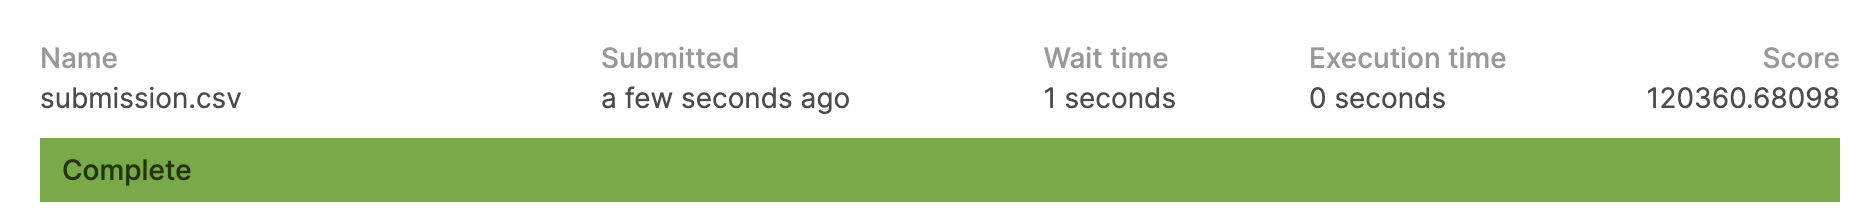

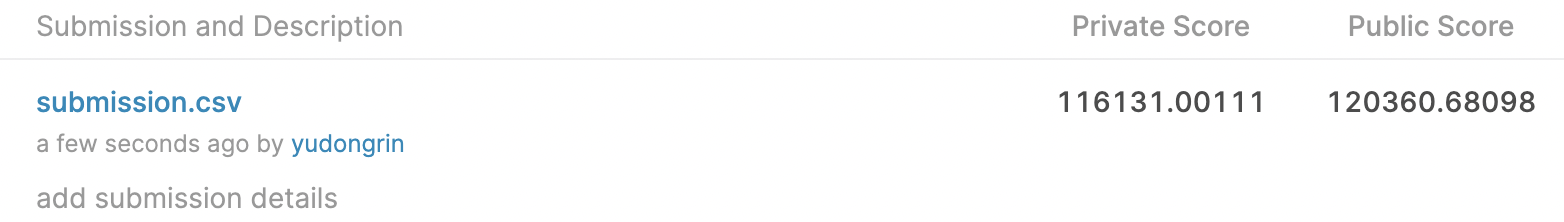

Ïó≠ÏãúÎÇò... Îã§Î•∏ Î∞©Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÌïúÎ≤à ÎÇÆÏ∂∞Î¥ÖÏãúÎã§

# Score ÎÇÆÏ∂îÍ∏∞

In [23]:
#Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

#dateÎ•º Ï†ïÏàòÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÑÏ≤òÎ¶¨
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)

#ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ price Î∂ÑÎ¶¨
y = train['price']
del train['price']

#id Ïª¨Îüº Ï†úÍ±∞
del train['id']


#ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ Ìä∏Î†àÏù∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï†ÑÏ≤òÎ¶¨
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
#test Îç∞Ïù¥ÌÑ∞ ÏóêÎäî Ïö∞Î¶¨Í∞Ä ÎßûÏ∂îÏñ¥Ïïº Ìï† ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïù∏ priceÎäî ÏóÜÎäîÏ†ê Ï£ºÏùò

del test['id']

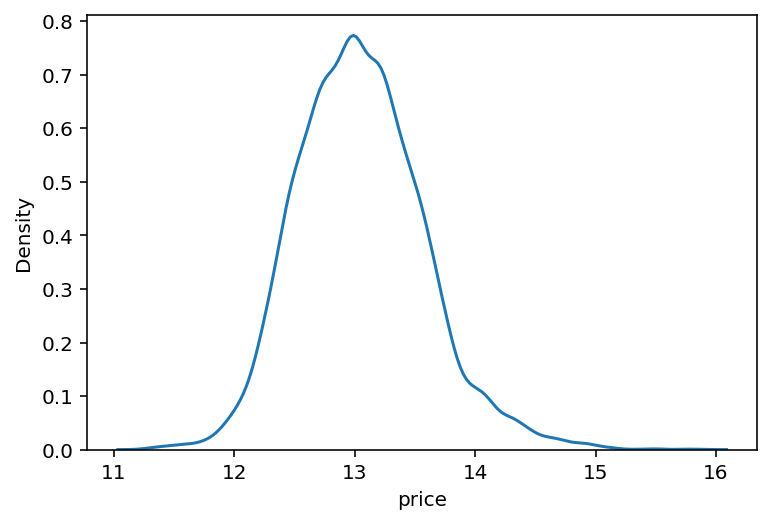

In [24]:
y = np.log1p(y)
y
sns.kdeplot(y)
plt.show()

In [25]:
#Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏûêÎ£åÌòï ÌôïÏù∏
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

#### Î™®Îç∏ ÌäúÎãù Í∞ÑÌé∏ÌôîÎ•º ÏúÑÌï¥ Ìï®Ïàò ÎßåÎì§Í∏∞

In [26]:
#ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ÌïòÍ∏∞
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [27]:
#RMSE Í≥ÑÏÇ∞ Ìï®Ïàò
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [28]:
random_state=2020        #2020ÏúºÎ°ú Í≥†Ï†ï 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [29]:
#ÎÑ§ Í∞ÄÏßÄÏùò Î™®Îç∏Ïóê ÎåÄÌï¥ RMSEÍ∞í Íµ¨ÌïòÍ∏∞
df = {}

for model in models:
    #Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    #train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    #Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    #ÏòàÏ∏°
    y_pred = model.predict(X_test)

    #ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    #data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [30]:
#ÏúÑ Í∞íÏùÑ Ìï®ÏàòÎ°ú ÎßåÎì§Í∏∞
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125487.071025
LGBMRegressor              111920.367359
XGBRegressor               110318.669566

#### Í∑∏Î¶¨Îìú ÌÉêÏÉâÏúºÎ°ú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÌïòÎäî Ìï®Ïàò ÎßåÎì§Í∏∞

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [32]:
#Í∞Å ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï°∞Ìï©
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [33]:
#Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Ï†êÏàò
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [34]:
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [35]:
#Ï†êÏàò Î≥ÄÌôò
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [36]:
#ÏúÑ Ï†êÏàòÎäî Root Mean Squared Log ErrorÏù¥Îã§
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [37]:
#RMSLEÍ∞Ä ÎÇÆÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [38]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [39]:
#Í∑∏Î¶¨Îìú ÌÉêÏÉâ
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [40]:
# Ìï¥Îãπ ÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµ ÌõÑ ÏòàÏ∏°
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)

# ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú ÎêòÎèåÎ¶¨Í∏∞
prediction = np.expm1(prediction)

In [41]:
#ÏÉòÌîå ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [42]:
#Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í ÎçÆÏñ¥Ïì∞Í∏∞
submission['price'] = prediction
submission.head()

id         price
0  15035  5.067667e+05
1  15036  4.795061e+05
2  15037  1.345155e+06
3  15038  3.122579e+05
4  15039  3.338645e+05

In [43]:
# ÌååÏùº Ï†ÄÏû•
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [44]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [45]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!


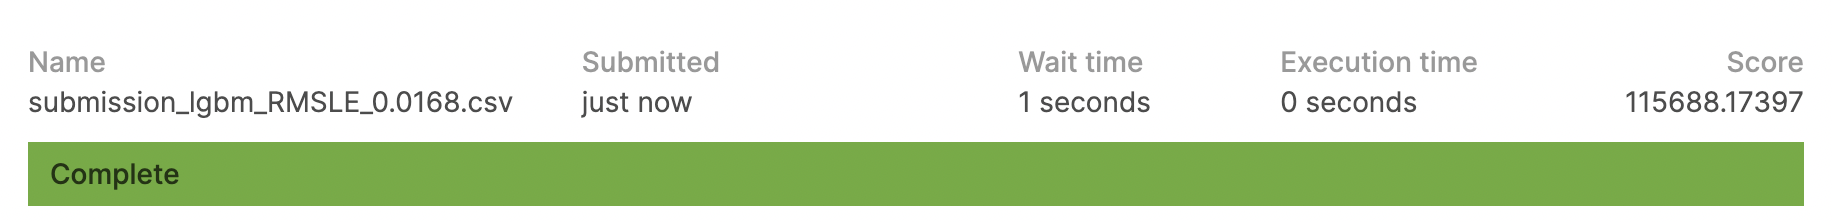

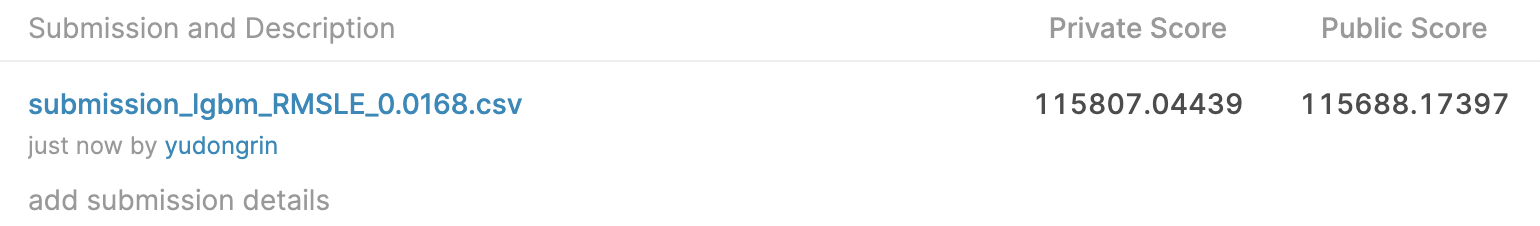

Ïö∞Î¶¨ÏóêÍ≤å Í∞ÄÏû• Ï§ëÏöîÌïú private scoreÏù∏Îç∞ Í∑∏Îã• Ïïà Îñ®Ïñ¥Ï°åÎÑ§Ïöî...

public scoreÎßå ÎÇÆÏïÑÏßÄÍ≥†

Îòê Îã§Î•∏ Î∞©Î≤ïÏùÑ Ï∞æÏïÑÎ¥ÖÏãúÎã§...

# Îã§Î•∏ Î∞©Î≤ï(ÌïúÎ≤à Îçî ÌïòÎ©¥ ÎÇÆÏïÑÏßàÏàòÎèÑ..?)
ÏßÑÏßú Îã®ÏàúÌûà Í∑∏ÎÉ• XGBRegressorÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïó¨ÏÑú Ï†ëÍ∑ºÌï®

In [46]:
#Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
data_dir = os.getenv('HOME')+'/aiffel/Exploration5/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

#dateÎ•º Ï†ïÏàòÌòï Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÑÏ≤òÎ¶¨
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)

#ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ price Î∂ÑÎ¶¨
y = train['price']
del train['price']

#id Ïª¨Îüº Ï†úÍ±∞
del train['id']


#ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ Ìä∏Î†àÏù∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ï†ÑÏ≤òÎ¶¨
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
#test Îç∞Ïù¥ÌÑ∞ ÏóêÎäî Ïö∞Î¶¨Í∞Ä ÎßûÏ∂îÏñ¥Ïïº Ìï† ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïù∏ priceÎäî ÏóÜÎäîÏ†ê Ï£ºÏùòÌï¥Ïïº Ìï®

del test['id']
y = np.log1p(y)

In [47]:
#Î®ºÏ†Ä Ìï¥Îãπ ÌååÎùºÎØ∏ÌÑ∞Î°ú Íµ¨ÏÑ±Îêú Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌïòÍ≥†, ÌïôÏäµ ÌõÑ ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏÉùÏÑ±
model = XGBRegressor(
    learning_rate =0.1, 
    n_estimators=1000, 
    max_depth=5, 
    min_child_weight=1, 
    gamma=0, 
    nthread=4, 
    scale_pos_weight=1, 
    seed=27
)
save_submission(model, train, y, test, 'XGB', rmsle='0.0168')

/aiffel/aiffel/Exploration5/kaggle_kakr_housing/data/submission_XGB_RMSLE_0.0168.csv saved!


scoreÎ•º ÎÇÆÏ∂îÎäî Î∞©Î≤ïÏùÑ Ïù¥Ïö©ÌñàÏùÑÎïå ÏïÑÏßÅ Ï°∞Í∏à Í≥ºÏ†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®Ìï¥ÏÑú learning_rate, n_estimators Ïô∏ÏóêÎèÑ Ï°∞Í∏à Îçî Ï∂îÍ∞ÄÌïòÎ©¥ Í≥ºÏ†ÅÌï©ÏùÑ Ï†úÏñ¥Ìï† Ïàò ÏûàÏùÑÍ≤ÉÍ∞ôÏïÑÏÑú ÏúÑÏôÄ Í∞ôÏù¥ ÏûëÏÑ±Ìï®

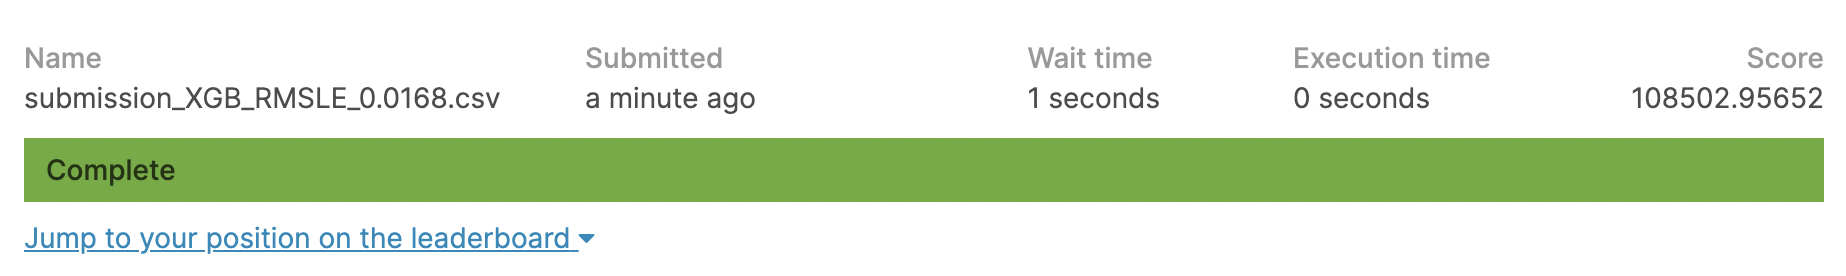

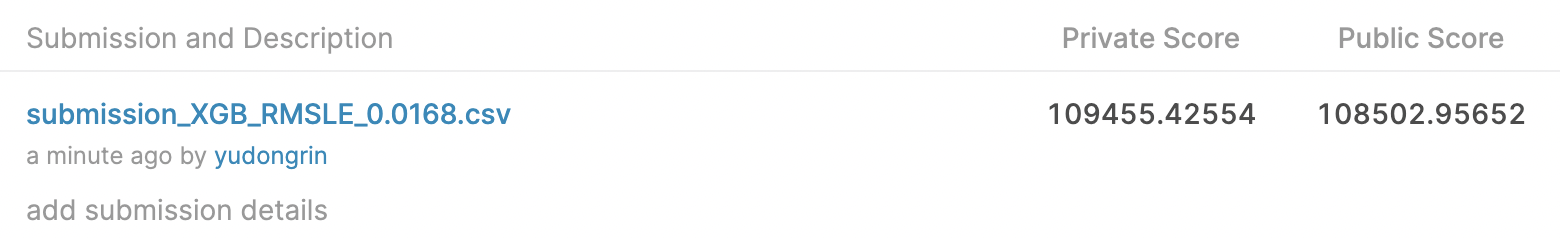

Ïò§Ïòà Îñ®Ïñ¥Ï°åÎã§ Îñ®Ïñ¥Ï°åÏñ¥!!

# ÌöåÍ≥†
Ï≤òÏùåÏóê LMSÏóêÏÑú ÏûëÏÑ±Îêú ÏΩîÎìúÎ•º Îî∞Îùº Ï†ÅÏúºÎ©∞ Í≤∞Í≥ºÎ•º Ï∫êÍ∏ÄÏóê Ïò¨Î†∏ÎçîÎãà 120000Ï†ê Ï†ïÎèÑ ÎÇòÏôîÎã§.

ÎëêÎ≤àÏß∏ ÏãúÎèÑÏóêÏÑúÎäî scoreÎ•º ÎÇÆÏ∂îÏñ¥ÏÑú ÌñàÏßÄÎßå Ïó≠ÏãúÎÇò 110000Ï†ê Ïù¥ÌïòÎ°ú ÎÇ¥Î†§Í∞ÄÎäî Í±¥ Ïñ¥Î†§Ïö¥ ÏùºÏù¥ÎùºÎäî Í≤ÉÏùÑ ÏïåÏïòÎã§.

Í∑∏ÎûòÏÑú Í≥†ÎØºÏùÑ ÌïòÎã§Í∞Ä lightGBMÏôÄ XGBoost Ïù¥ ÎëòÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ï†êÏàòÎ•º ÎÇÆÏ∂ú Ïàò ÏûàÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏùÑ ÌñàÎã§.

Í∑∏ÎûòÏÑú Íµ¨Í∏Ä Í≤ÄÏÉâÏùÑ ÌôúÏö©Ìï¥ÏÑú ÎßéÏùÄ ÏûêÎ£åÎì§ÏùÑ ÌÜ†ÎåÄÎ°ú Í≥ºÏ†ÅÌï©ÏùÑ Ïû°ÏùÑ Ïàò ÏûàÏóàÎã§.(Ï∞∏Í≥†Ìïú ÏûêÎ£åÎ•º Ï≤®Î∂ÄÌïòÍ≥† Ïã∂ÏóàÏßÄÎßå ÏûêÎ£åÎ•º Í∑∏ÎÉ• Îã´ÏïÑ Î≤ÑÎ†§ÏÑú ÏóÜÏùå. ÌòπÏãúÎÇò ÎÇòÏ§ëÏóê Ï∞æÍ≤å ÎêúÎã§Î©¥ Íº≠ Ï≤®Î∂ÄÌïòÎèÑÎ°ù Ìï†ÍªòÏöî...„Öé)

ÏãúÍ∞ÑÏù¥ ÎêúÎã§Î©¥ Îòê Îã§Î•∏ Î∞©Î≤ïÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Ï†êÏàòÎ•º Îçî ÎÇÆÏ∂∞Î≥¥ÎäîÍ≤ÉÎèÑ Í¥úÏ∞ÆÏùÑ Í≤ÉÍ∞ôÎã§.